In [2]:
# 乱数シードを固定
import random
import numpy as np

random.seed(1234)
np.random.seed(1234)

In [3]:
import scipy.stats
from numpy.random import randn
import matplotlib.pyplot as plt
%matplotlib inline

# ZからYへ因果が存在する場合

In [10]:
# ノイズの生成 
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Z = e_z
Y = 2*Z + e_y

In [11]:
# 相関係数
np.corrcoef(Z, Y)

array([[1.        , 0.91048727],
       [0.91048727, 1.        ]])

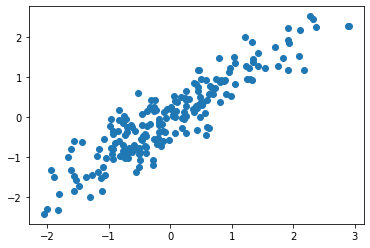

In [13]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std, Y_std)

# 1. 擬似相関：因果が逆
因果が逆で、YからZへ因果が存在する場合のデータの様子と、相関の大きさを確認します。

In [15]:
# ノイズの生成 
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Y = e_y
Z = 2*Y + e_z

# 相関係数
np.corrcoef(Z, Y)

array([[1.       , 0.8989026],
       [0.8989026, 1.       ]])

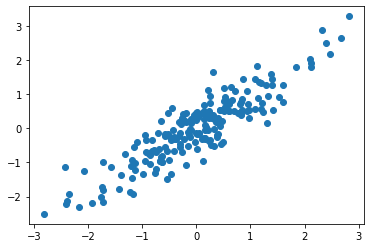

In [16]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std, Y_std)

# 2. 擬似相関：共通の原因(交絡)
変数Zと変数Yの間には因果関係はなく、共通の原因(交絡因子)変数xが存在している場合を確認

In [17]:
# ノイズの生成 
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)
e_z = randn(num_data)

# データの生成
Y = 3.3*e_x + e_y
Z = 3.3*e_x + e_z

# 相関係数
np.corrcoef(Z, Y)

array([[1.        , 0.92960934],
       [0.92960934, 1.        ]])

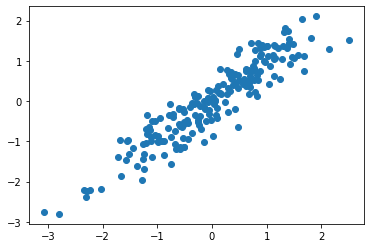

In [18]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std, Y_std)

# 3. 擬似相関：合流点での選抜
まずは、選抜前のデータを作成し描画

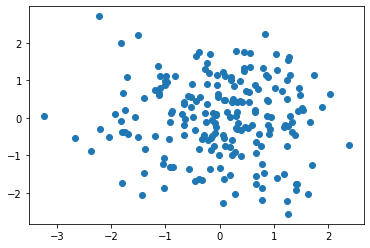

In [19]:
# ノイズの生成 
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)

# データの生成
x =  e_x
y =  e_y

# 散布図を描画
plt.scatter(x, y)

In [20]:
np.corrcoef(x, y)

array([[ 1.        , -0.05410165],
       [-0.05410165,  1.        ]])

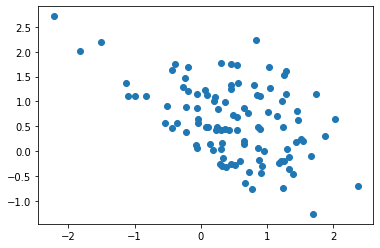

In [21]:
# 合流点を作成
z = x+ y

# 新たな合流点での条件を満たす変数の用意
x_new = np.array([])
y_new = np.array([])

# zの値が0以上で選抜してnew変数に追加(append)します
for i in range(num_data):
    if z[i] > 0.0:
        x_new = np.append(x_new, x[i])
        y_new = np.append(y_new, y[i])
        
# 散布図を描画
plt.scatter(x_new, y_new)

In [22]:
np.corrcoef(x_new, y_new)

array([[ 1.        , -0.47596337],
       [-0.47596337,  1.        ]])